# LLM blackjack experiment data analysis

In [169]:
!pip install -q -U pandas
import pandas as pd
!pip install -q -U seaborn
# some imports to set up plotting
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns
!pip install -q -U plotly
import plotly.graph_objects as go
import numpy as np 

In [170]:
# Load the CSV file into a pandas DataFrame
dfBlackJackLLM = pd.read_csv("Data\BlackJackLlmTotal20240425-2021.csv")
dfBlackJackLLM['win'] = dfBlackJackLLM['rewards'].apply(lambda x: 1 if x == 1 else 0)
print("Shape:")
print(dfBlackJackLLM.shape)
print("Columns:")
print(dfBlackJackLLM.columns)


Shape:
(1700, 9)
Columns:
Index(['promptKey', 'temperature', 'timesteps', 'rewards', 'hitActions',
       'standActions', 'randomActions', 'DateTime', 'win'],
      dtype='object')


In [171]:
dfBlackJackLLM.head()

,promptKey,temperature,timesteps,rewards,hitActions,standActions,randomActions,DateTime,win
0,zero_shot_prompt,0.1,1,-1.0,1,0,0,2024-04-25 18:22:10.180025,0
1,zero_shot_prompt,0.1,2,-1.0,2,0,0,2024-04-25 18:22:10.312699,0
2,zero_shot_prompt,0.1,2,-1.0,2,0,0,2024-04-25 18:22:10.443303,0
3,zero_shot_prompt,0.1,2,-1.0,2,0,0,2024-04-25 18:22:10.580843,0
4,zero_shot_prompt,0.1,1,-1.0,1,0,0,2024-04-25 18:22:10.647822,0


In [172]:
print(dfBlackJackLLM.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   promptKey      1700 non-null   object 
 1   temperature    1700 non-null   float64
 2   timesteps      1700 non-null   int64  
 3   rewards        1700 non-null   float64
 4   hitActions     1700 non-null   int64  
 5   standActions   1700 non-null   int64  
 6   randomActions  1700 non-null   int64  
 7   DateTime       1700 non-null   object 
 8   win            1700 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 119.7+ KB
None


In [173]:
dfBlackJackLLM.describe()

,temperature,timesteps,rewards,hitActions,standActions,randomActions,win
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.517647,1.811176,-0.727059,1.582941,0.228235,0.081765,0.124706
std,0.350288,0.902677,0.669417,1.019326,0.419819,0.361179,0.330482
min,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.400000,2.000000,-1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.700000,2.000000,-1.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,7.000000,1.000000,7.000000,1.000000,4.000000,1.000000


In [174]:
dfBlackJackLLM.groupby(["promptKey","temperature"]).describe(percentiles=[])

timesteps                                 \
                                        count  mean       std  min  50%  max   
promptKey               temperature                                            
Chain_of_Thought_prompt 0.1             100.0  1.65  0.770347  1.0  1.5  5.0   
                        0.4             100.0  1.67  0.766139  1.0  2.0  4.0   
                        0.7             100.0  1.76  0.911431  1.0  1.5  4.0   
                        1.0             100.0  1.59  0.853927  1.0  1.0  5.0   
Random                  0.0             100.0  1.39  0.633971  1.0  1.0  4.0   
few_shot_prompt         0.1             100.0  1.86  0.853040  1.0  2.0  5.0   
                        0.4             100.0  1.93  1.056533  1.0  2.0  7.0   
                        0.7             100.0  2.03  0.892788  1.0  2.0  4.0   
                        1.0             100.0  1.85  0.946818  1.0  2.0  5.0   
one_shot_prompt         0.1             100.0  1.77  0.919541  1.0  2.0  6.0   
                        0.4             100.0  1.88  0.902074  1.0  2.0  5.0   
                        0.7             100.0  1.84  0.825356  1.0  2.0  4.0   
                        1.0             100.0  1.90  0.893297  1.0  2.0  5.0   
zero_shot_prompt        0.1             100.0  1.95  1.048086  1.0  2.0  5.0   
                        0.4             100.0  1.99  1.058825  1.0  2.0  5.0   
                        0.7             100.0  1.96  0.920255  1.0  2.0  5.0   
                        1.0             100.0  1.77  0.814701  1.0  2.0  5.0   

                                    rewards                       ...  \
                                      count  mean       std  min  ...   
promptKey               temperature                               ...   
Chain_of_Thought_prompt 0.1           100.0 -0.38  0.885118 -1.0  ...   
                        0.4           100.0 -0.29  0.935225 -1.0  ...   
                        0.7           100.0 -0.24  0.933333 -1.0  ...   
                        1.0           100.0 -0.40  0.887625 -1.0  ...   
Random                  0.0           100.0 -0.31  0.917782 -1.0  ...   
few_shot_prompt         0.1           100.0 -0.98  0.200000 -1.0  ...   
                        0.4           100.0 -0.90  0.438086 -1.0  ...   
                        0.7           100.0 -0.76  0.637546 -1.0  ...   
                        1.0           100.0 -1.00  0.000000 -1.0  ...   
one_shot_prompt         0.1           100.0 -0.71  0.686007 -1.0  ...   
                        0.4           100.0 -0.87  0.485237 -1.0  ...   
                        0.7           100.0 -0.76  0.653197 -1.0  ...   
                        1.0           100.0 -0.76  0.653197 -1.0  ...   
zero_shot_prompt        0.1           100.0 -1.00  0.000000 -1.0  ...   
                        0.4           100.0 -1.00  0.000000 -1.0  ...   
                        0.7           100.0 -1.00  0.000000 -1.0  ...   
                        1.0           100.0 -1.00  0.000000 -1.0  ...   

                                    randomActions                   win        \
                                              std  min  50%  max  count  mean   
promptKey               temperature                                             
Chain_of_Thought_prompt 0.1              0.000000  0.0  0.0  0.0  100.0  0.27   
                        0.4              0.000000  0.0  0.0  0.0  100.0  0.33   
                        0.7              0.000000  0.0  0.0  0.0  100.0  0.34   
                        1.0              0.000000  0.0  0.0  0.0  100.0  0.27   
Random                  0.0              0.633971  1.0  1.0  4.0  100.0  0.31   
few_shot_prompt         0.1              0.000000  0.0  0.0  0.0  100.0  0.01   
                        0.4              0.000000  0.0  0.0  0.0  100.0  0.05   
                        0.7              0.000000  0.0  0.0  0.0  100.0  0.11   
                        1.0              0.000000  0.0  0.0  0.0  100.0  0.00   
on

In [175]:
pivot = dfBlackJackLLM.pivot_table(
    ["timesteps", "hitActions","standActions", "randomActions", "rewards", "win"],
    ["promptKey","temperature"],
    aggfunc="sum",
)

pivot['games'] = 100
pivot['% hit'] = (pivot.hitActions / pivot.timesteps *100 )
pivot['% stand'] = (pivot.standActions / pivot.timesteps *100 )
pivot['% random'] = (pivot.randomActions / pivot.timesteps *100 )
pivot['% win'] = (pivot.win / pivot.games *100 )
# Merge columns into one column in the correct format
pivot['hit'] = pivot['hitActions'].astype(str) + ' (' + pivot['% hit'].map('{:.1f}'.format).astype(str) + '%)'
pivot['stand'] = pivot['standActions'].astype(str) + ' (' + pivot['% stand'].map('{:.1f}'.format).astype(str) + '%)'
pivot['random'] = pivot['randomActions'].astype(str) + ' (' + pivot['% random'].map('{:.1f}'.format).astype(str) + '%)'
pivot['games won'] = pivot['win'].astype(str) + ' (' + pivot['% win'].map('{:.1f}'.format).astype(str) + '%)'

pivotOrdered = pivot[["games", "timesteps", "hit", 'stand',"random", "rewards", "games won"]].copy()
pivotOrdered

games  timesteps           hit  \
promptKey               temperature                                   
Chain_of_Thought_prompt 0.1            100        165   121 (73.3%)   
                        0.4            100        167   122 (73.1%)   
                        0.7            100        176   121 (68.8%)   
                        1.0            100        159   107 (67.3%)   
Random                  0.0            100        139    64 (46.0%)   
few_shot_prompt         0.1            100        186   183 (98.4%)   
                        0.4            100        193   186 (96.4%)   
                        0.7            100        203   188 (92.6%)   
                        1.0            100        185   181 (97.8%)   
one_shot_prompt         0.1            100        177   150 (84.7%)   
                        0.4            100        188   172 (91.5%)   
                        0.7            100        184   164 (89.1%)   
                        1.0            100        190   165 (86.8%)   
zero_shot_prompt        0.1            100        195  195 (100.0%)   
                        0.4            100        199  199 (100.0%)   
                        0.7            100        196  196 (100.0%)   
                        1.0            100        177  177 (100.0%)   

                                          stand        random  rewards  \
promptKey               temperature                                      
Chain_of_Thought_prompt 0.1          44 (26.7%)      0 (0.0%)    -38.0   
                        0.4          45 (26.9%)      0 (0.0%)    -29.0   
                        0.7          55 (31.2%)      0 (0.0%)    -24.0   
                        1.0          52 (32.7%)      0 (0.0%)    -40.0   
Random                  0.0          75 (54.0%)  139 (100.0%)    -31.0   
few_shot_prompt         0.1            3 (1.6%)      0 (0.0%)    -98.0   
                        0.4            7 (3.6%)      0 (0.0%)    -90.0   
                        0.7           15 (7.4%)      0 (0.0%)    -76.0   
                        1.0            4 (2.2%)      0 (0.0%)   -100.0   
one_shot_prompt         0.1          27 (15.3%)      0 (0.0%)    -71.0   
                        0.4           16 (8.5%)      0 (0.0%)    -87.0   
                        0.7          20 (10.9%)      0 (0.0%)    -76.0   
                        1.0          25 (13.2%)      0 (0.0%)    -76.0   
zero_shot_prompt        0.1            0 (0.0%)      0 (0.0%)   -100.0   
                        0.4            0 (0.0%)      0 (0.0%)   -100.0   
                        0.7            0 (0.0%)      0 (0.0%)   -100.0   
                        1.0            0 (0.0%)      0 (0.0%)   -100.0   

                                      games won  
promptKey               temperature              
Chain_of_Thought_prompt 0.1          27 (27.0%)  
                        0.4          33 (33.0%)  
                        0.7          34 (34.0%)  
                        1.0          27 (27.0%)  
Random                  0.0          31 (31.0%)  
few_shot_prompt         0.1            1 (1.0%)  
                        0.4            5 (5.0%)  
                        0.7          11 (11.0%)  
                        1.0            0 (0.0%)  
one_shot_prompt         0.1          13 (13.0%)  
                        0.4            6 (6.0%)  
                        0.7          12 (12.0%)  
                        1.0          12 (12.0%)  
zero_shot_prompt        0.1            0 (0.0%)  
                        0.4            0 (0.0%)  
                        0.7            0 (0.0%)  
                        1.0            0 (0.0%)

In [176]:
grouped_df = dfBlackJackLLM.groupby(['promptKey']).mean(numeric_only=True).reset_index()

fig = go.Figure()


fig.add_trace(go.Bar(x=-grouped_df['standActions'].values,
                        y=grouped_df['promptKey'],
                        orientation='h',
                        name='Stand',
                        customdata=grouped_df['rewards']))

fig.add_trace(go.Bar(x=grouped_df['hitActions'].values,
                        y=grouped_df['promptKey'],
                        orientation='h',
                        name='Hit',
                        customdata=grouped_df['rewards']))

fig.update_layout(barmode='relative', 
                  height=400, 
                  width=700, 
                  yaxis_autorange='reversed',
                  bargap=0.01,
                  legend_orientation ='h',
                  legend_x=0.10, legend_y=-0.1,
                  title="Average of stand and hit actions per game"
                 )
fig.show()

In [177]:
freq_table = pd.crosstab(dfBlackJackLLM['promptKey'], dfBlackJackLLM['rewards'], normalize='index') 
freq_table

rewards,-1.0,0.0,1.0
promptKey,,,
Chain_of_Thought_prompt,0.6300,0.0675,0.3025
Random,0.6200,0.0700,0.3100
few_shot_prompt,0.9525,0.0050,0.0425
one_shot_prompt,0.8825,0.0100,0.1075
zero_shot_prompt,1.0000,0.0000,0.0000


In [178]:
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

C:\Users\johan\AppData\Local\Temp\ipykernel_21980\2916267392.py:6: UserWarning:

The palette list has more values (10) than needed (5), which may not be intended.



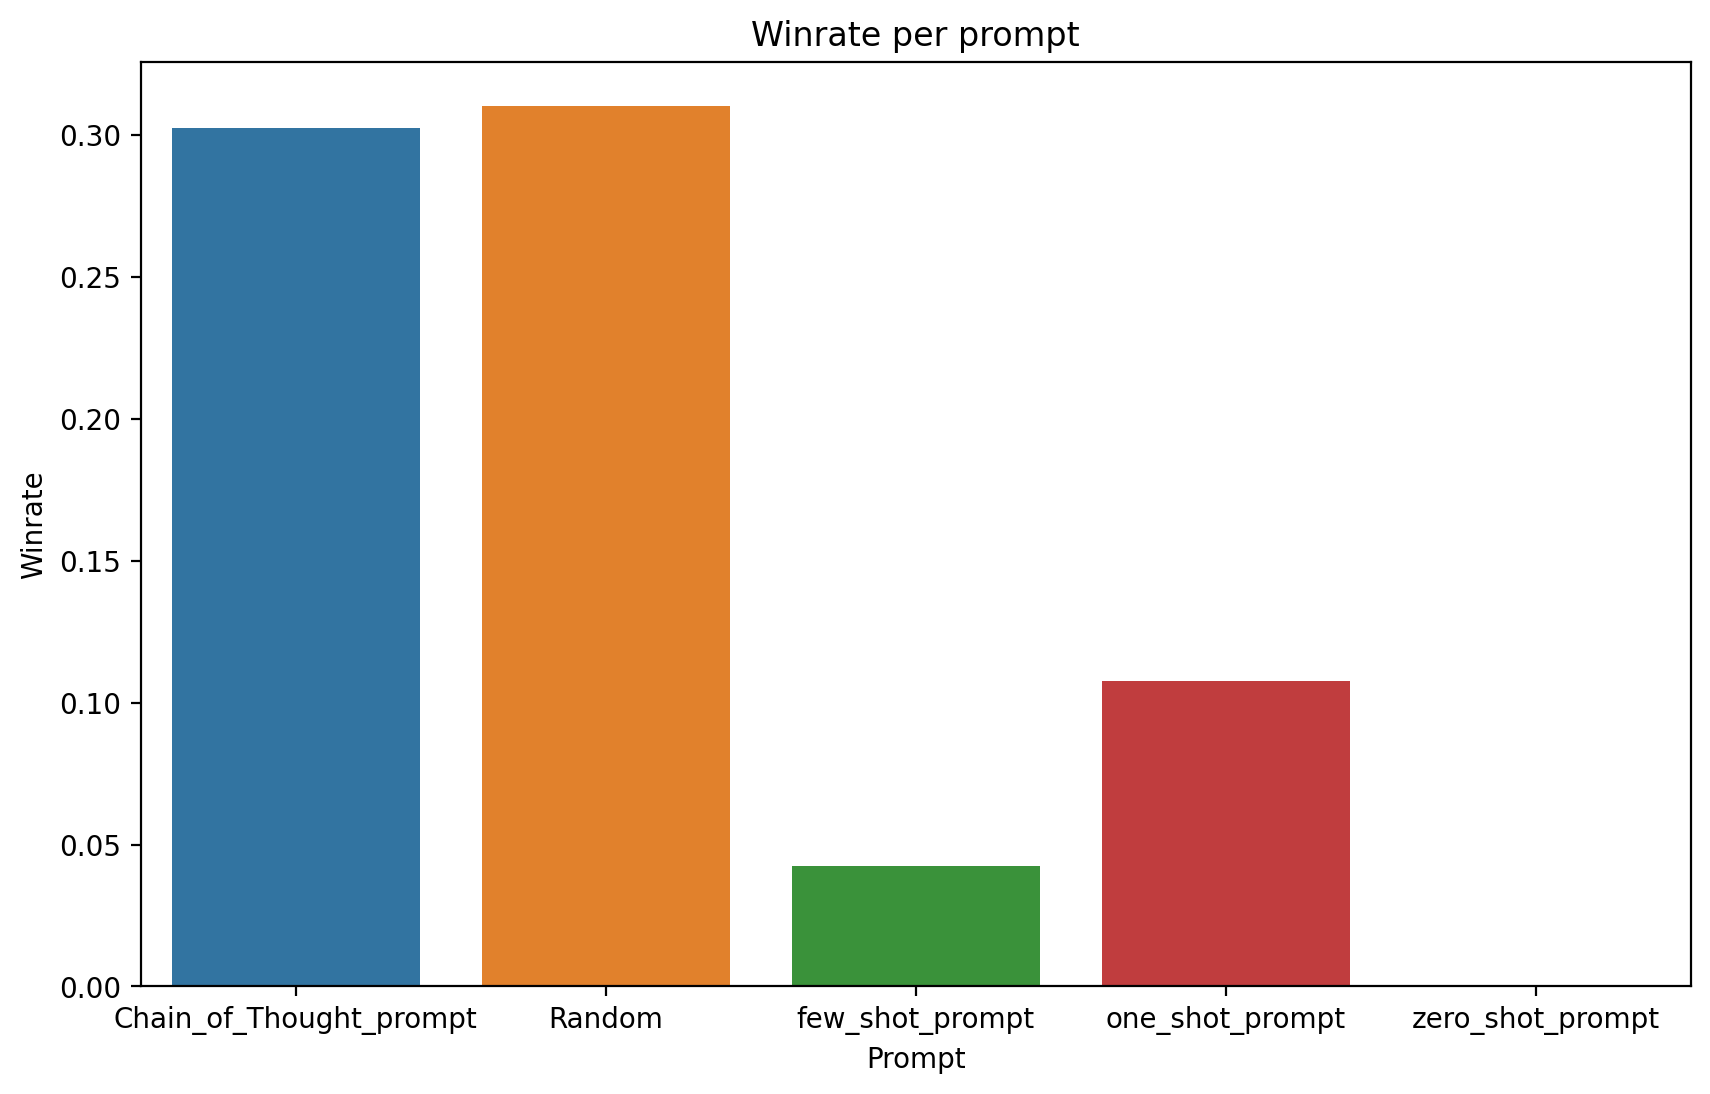

In [179]:
# Group by temperature and prompt, then sum the rewards
grouped_df = dfBlackJackLLM.groupby(['promptKey']).mean(numeric_only=True).reset_index()

# Plot the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='promptKey', y='win', hue='promptKey', data=grouped_df, palette=sns.color_palette())
plt.title('Winrate per prompt')
plt.xlabel('Prompt')
plt.ylabel('Winrate')

#plt.legend(title='Prompt')
plt.show()

C:\Users\johan\AppData\Local\Temp\ipykernel_21980\916577015.py:6: UserWarning:

The palette list has more values (6) than needed (5), which may not be intended.



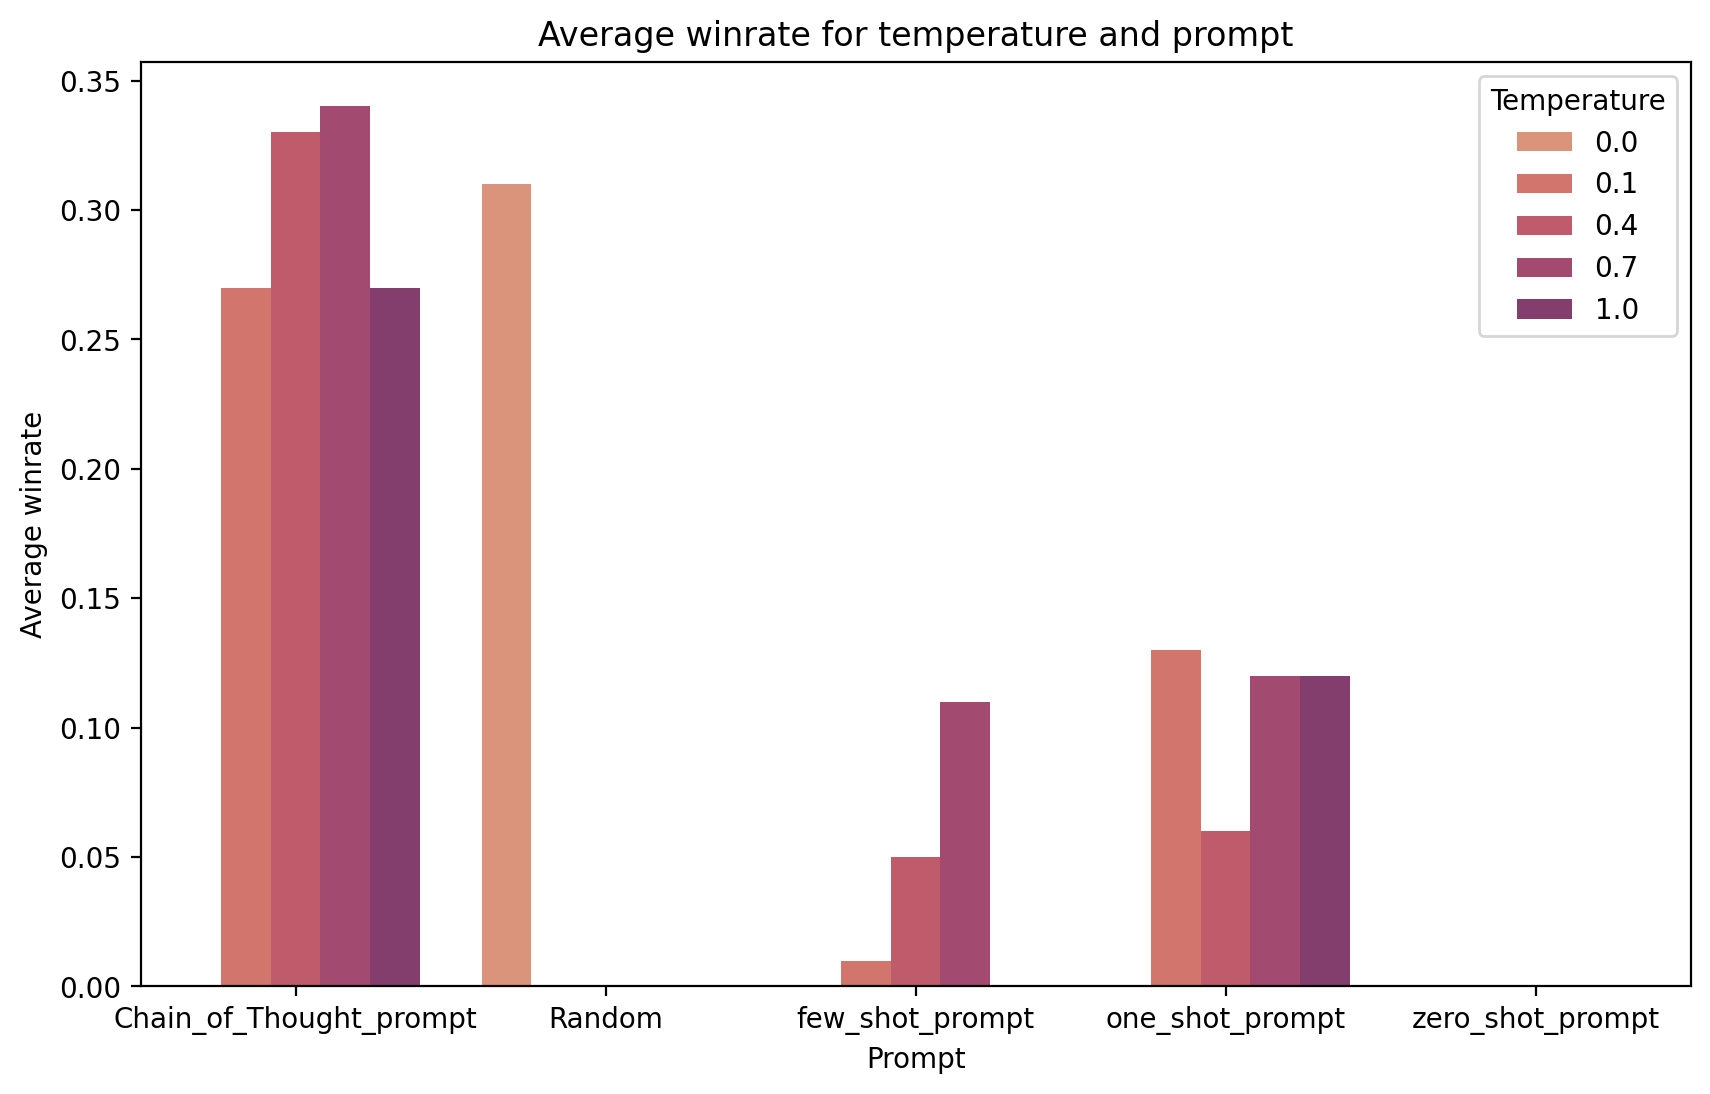

In [183]:
# Group by temperature and prompt, then sum the rewards
grouped_df = dfBlackJackLLM.groupby(['promptKey', 'temperature']).mean(numeric_only=True).reset_index()

# Plot the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='promptKey', y='win', hue='temperature', data=grouped_df, palette=sns.color_palette("flare"))
plt.title('Average winrate for temperature and prompt')
plt.xlabel('Prompt')
plt.ylabel('Average winrate')

plt.legend(title='Temperature')
plt.show()

C:\Users\johan\AppData\Local\Temp\ipykernel_21980\3196256984.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\johan\AppData\Local\Temp\ipykernel_21980\3196256984.py:5: UserWarning:

The palette list has more values (6) than needed (4), which may not be intended.



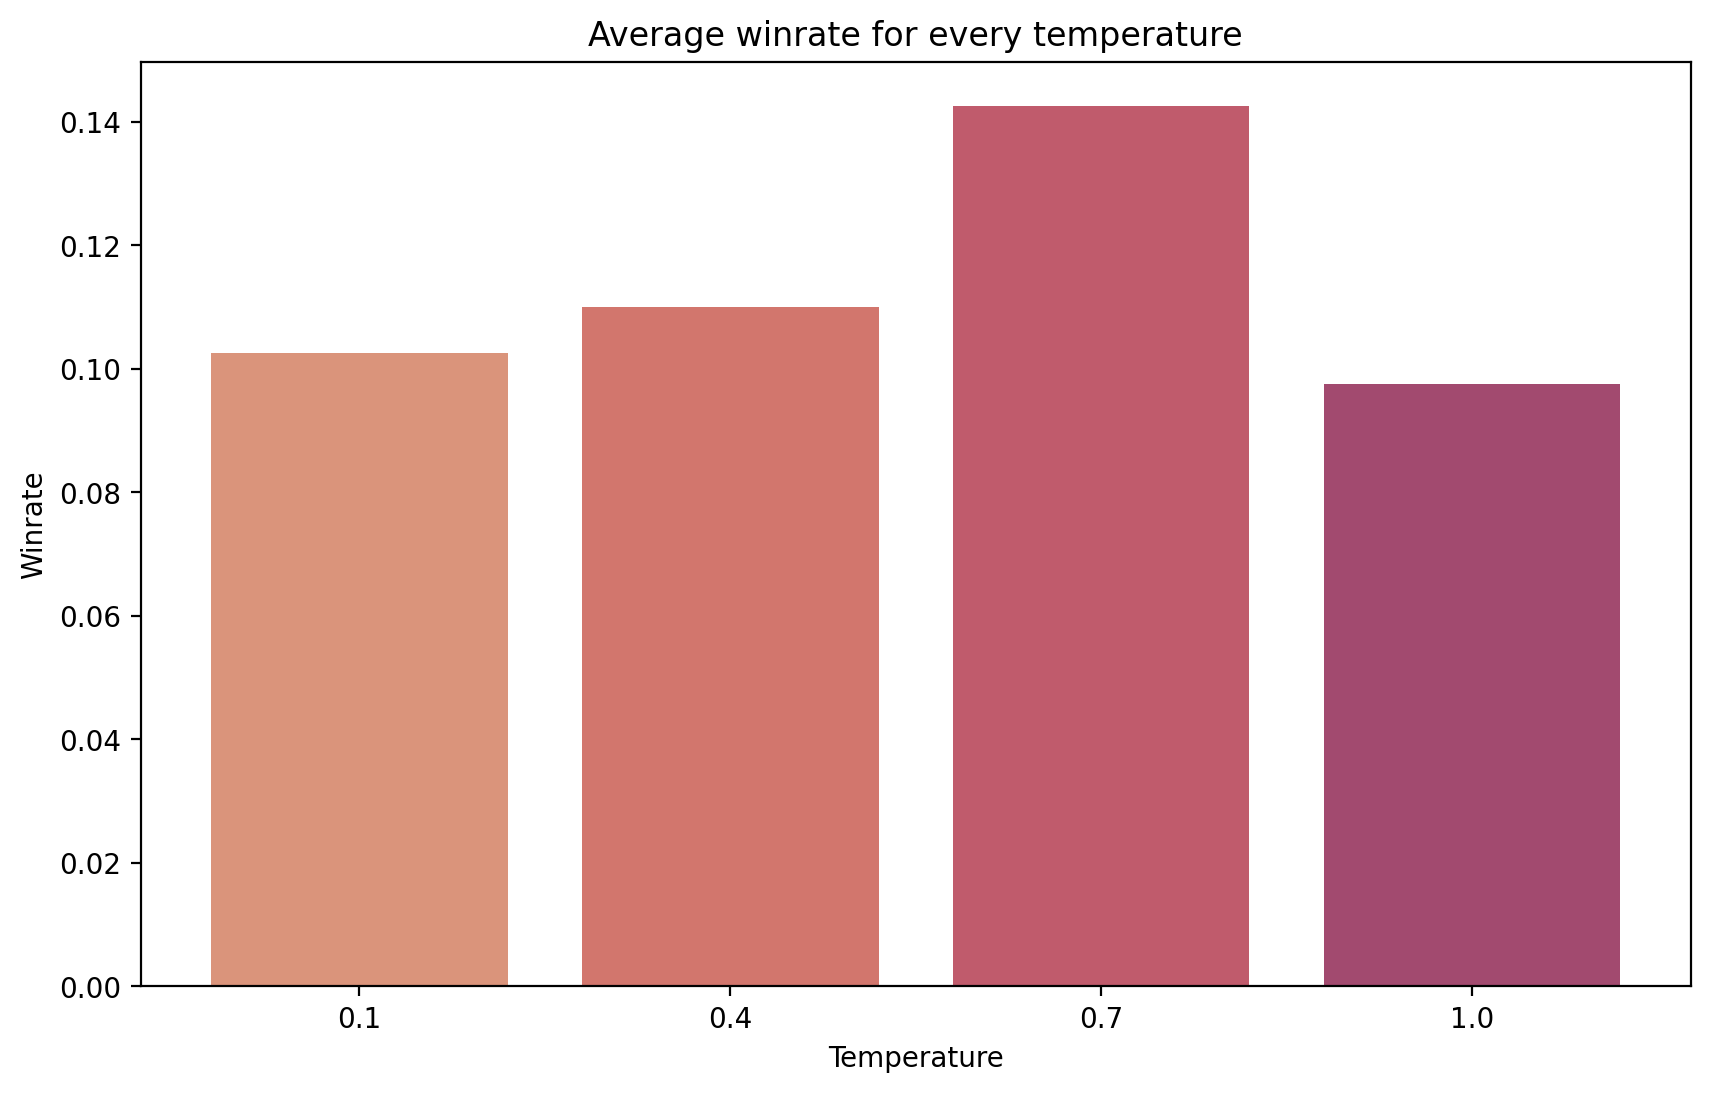

In [181]:
grouped_df = dfBlackJackLLM[dfBlackJackLLM['promptKey'] != "Random"] .groupby(['temperature']).mean(numeric_only=True).reset_index()

# Plot the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='temperature', y='win', data=grouped_df, palette=sns.color_palette("flare"), order=grouped_df['temperature'])
plt.title('Average winrate for every temperature')
plt.xlabel('Temperature')
plt.ylabel('Winrate')
plt.plot(legend=False)
plt.show()

C:\Users\johan\AppData\Local\Temp\ipykernel_21980\488412029.py:6: UserWarning:

The palette list has more values (6) than needed (5), which may not be intended.



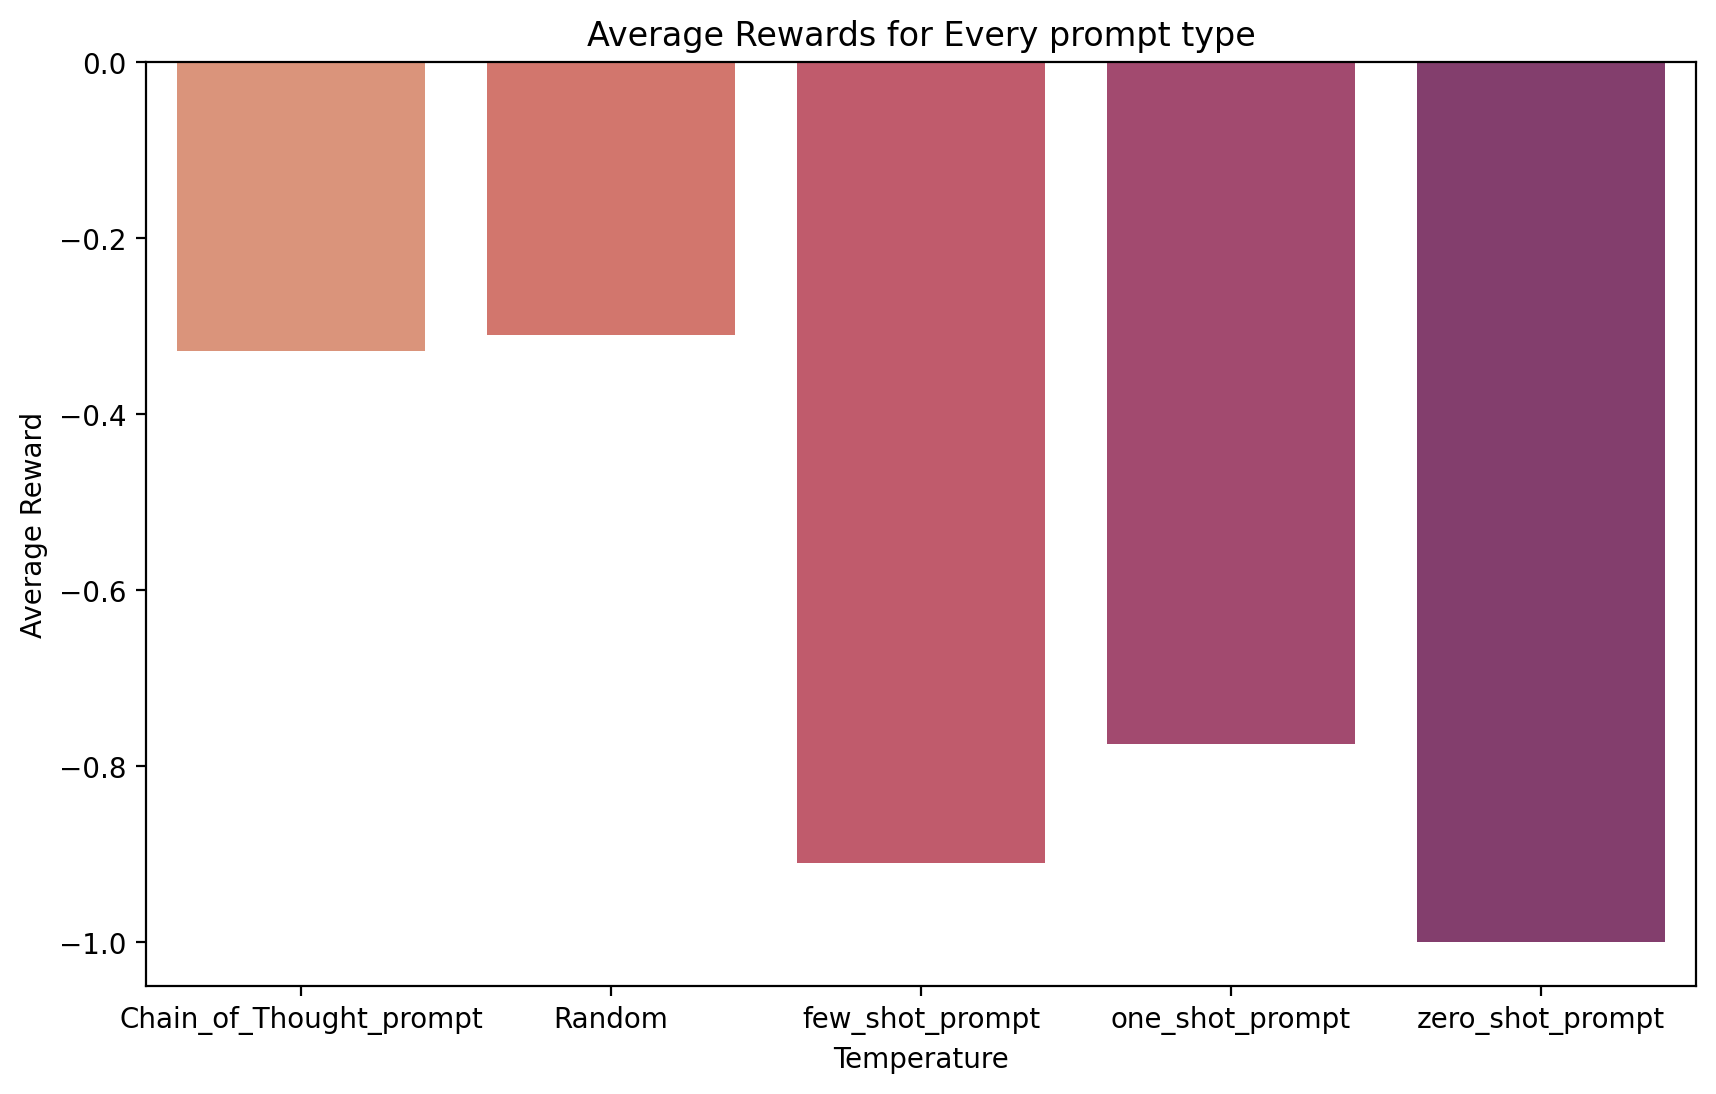

In [182]:
# Group by temperature and prompt, then sum the rewards
grouped_df = dfBlackJackLLM.groupby(['promptKey']).mean(numeric_only=True).reset_index()

# Plot the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='promptKey', y='rewards', hue='promptKey', data=grouped_df, palette=sns.color_palette("flare"), order=grouped_df['promptKey'])
plt.title('Average Rewards for Every prompt type')
plt.xlabel('Temperature')
plt.ylabel('Average Reward')


plt.show()